In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [12]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("boston/BostonHousing.csv")

In [6]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
df.shape

(506, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


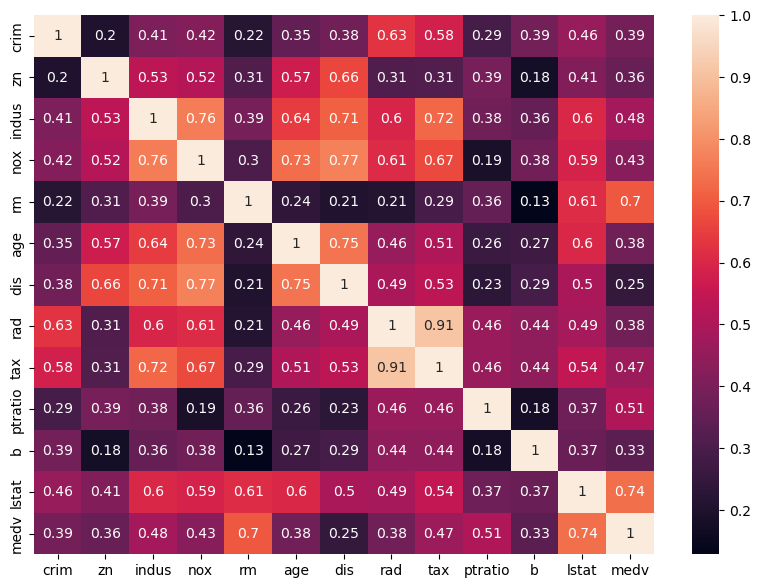

In [18]:
corr_df = df.drop('chas', axis = 1)
plt.figure(figsize=(10,7))
corr = corr_df.corr().abs()
ax = sns.heatmap(corr, annot=True)

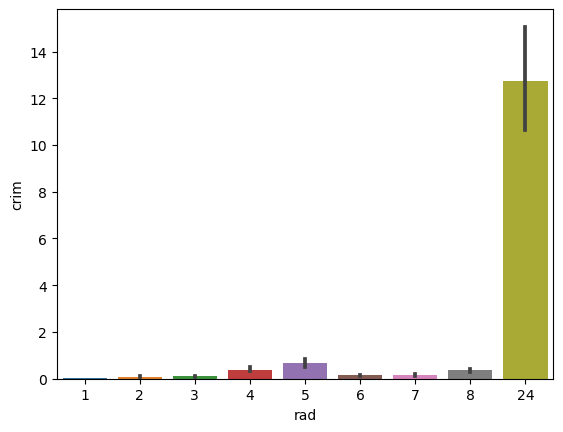

In [31]:
sns.barplot(x = 'rad', y = 'crim', data = df);

<h1>Чем выше индекс доступа к шоссе, тем больше преступлений совершается в этой зоне. (Это может быть из-за того, что преступнику легче скрыться используя большие дороги)<h1>

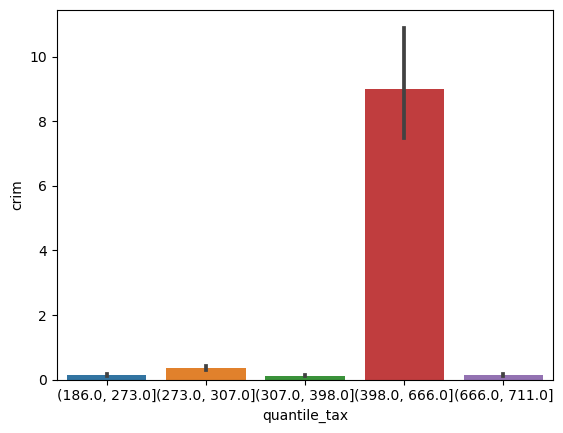

In [39]:
'''
qcut - Функция определяет интервалы с использованием процентилей на основе распределения данных,
а не фактических числовых границ интервалов.
'''
df['quantile_tax'] = pd.qcut(df['tax'], q=[0, .2, .4, .6, .8, 1], precision=0)
sns.barplot(x = 'quantile_tax', y = 'crim', data = df);

In [57]:
filtered_df = df[(398 <= df['tax']) & (df['tax'] <= 666)]
df['quantile_tax'] = pd.qcut(filtered_df['tax'], q=[0, .2, .4, .6, .8, 1], precision=0)
sns.barplot(x = 'quantile_tax', y = 'crim', data = filtered_df);


ValueError: Bin edges must be unique: array([398., 403., 666., 666., 666., 666.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [56]:
df[df.tax == 666]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,quantile_tax
356,8.98296,0.0,18.1,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8,"(398.0, 666.0]"
357,3.84970,0.0,18.1,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7,"(398.0, 666.0]"
358,5.20177,0.0,18.1,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7,"(398.0, 666.0]"
359,4.26131,0.0,18.1,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6,"(398.0, 666.0]"
360,4.54192,0.0,18.1,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0,"(398.0, 666.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.1,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42,21.8,"(398.0, 666.0]"
484,2.37857,0.0,18.1,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34,20.6,"(398.0, 666.0]"
485,3.67367,0.0,18.1,0,0.583,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,21.2,"(398.0, 666.0]"
486,5.69175,0.0,18.1,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1,"(398.0, 666.0]"
